# Notebook to add more rfi scamples for training/testing

* `comms_rfi.ipynb` similar to this notebook, but for comms RFI not ground rfi.
* `label_ro_nb.ipynb` (notebook for assigning labels to dataset) + `view_ro_for_labels.ipynb` (notebook for viewin samples from `/scripts/make_label_plots.py` to assign labels)

## RFI in Ann's/Clara's results of 6 month data

It seems the model is not identifying ground sources of RFI, likely due to largely being trained by internal/comms/airborne RFI.


## Workflow

* make_label_plots for specific threshold:
36 N 31 E
29 N 36 E
    * l2 or l1 sigma_phi >0.05 **OR**
    * max_rfi > .05



In [39]:
import numpy as np
import pandas as pd
import xarray as xr

import sys  
sys.path.insert(1, '/home/stdi2687/leo-ml/scripts')

from feature_extract_util import *
from ml_util import *

In [2]:
all_fdf=pd.read_pickle('../data/data/feature_set_all_single_file/all_fdf_v2.pkl')

In [3]:
len(all_fdf)

677987

In [51]:
lats=[29,36]
lons=[31,36]
win_df=all_fdf[all_fdf.lat_m.between(lats[0], lats[1])]
win_df=win_df[win_df.lon_m.between(lons[0], lons[1])]
win_df2=win_df[win_df.rfi_max>3e-4]

In [52]:
len(win_df2['sample'].unique())

41

<AxesSubplot:>

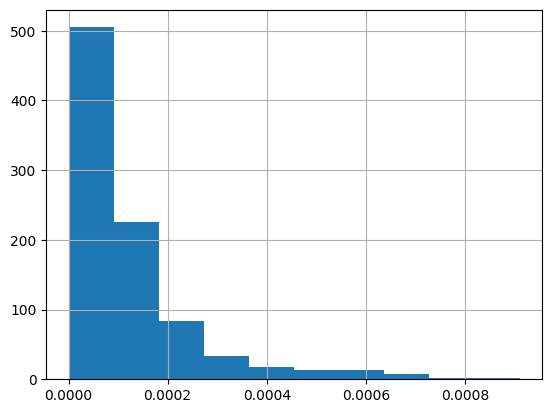

In [22]:
win_df.rfi_max.hist()

In [8]:
#max_rfi=[]
rfi_labels_li=[]
count=0

for sample_ in win_df.sort_values(by=['rfi_max'])['sample'].unique()[:]:

    fn1='/media/datastore/mirror/spwxdp/repro4/spire/level1b/scnPhs/%s/scnPhs_%s.0001_nc'%(sample_[:8],sample_)
    fn2='/media/datastore/mirror/spwxdp/repro4/spire/level2/scnLv2/%s/scnLv2_%s.0001_nc'%(sample_[:8],sample_)

    try:
        lv1=xr.open_dataset(fn1, decode_times=False)
        lv2=xr.open_mfdataset(fn2, decode_times=False)
        # keep for viewing distribution of max's
        
        feature_pkl='../data/data/feature_sets/%s.pkl' %sample_
        import os.path
        if os.path.isfile(feature_pkl):
            rfi_labels_li+=[sample_]
            count+=1
            continue
        fdf=extract_fs(lv1,lv2)
        plot_leo_feat_RFI(sample_, lv1,lv2,fdf)
        fdf.to_pickle('../data/data/feature_sets/%s.pkl' %sample_)
        count+=1
        rfi_labels_li+=[sample_]

    except Exception as ex:
        print(ex)
        #print(file_n)


# Save dataframe of samples created
li_ln=len(rfi_labels_li)
converted_labels_scint_dict={"Filename":rfi_labels_li, "Approx time (s)":np.full(li_ln, np.nan) ,	
 "Label":np.full(li_ln, "rfi 2") ,	"Unnamed: 4":np.full(li_ln, np.nan) ,	
 "Unnamed: 5":np.full(li_ln, np.nan) ,	"labeled?":np.full(li_ln, False) }

converted_labels_scint_df=pd.DataFrame(converted_labels_scint_dict)
converted_labels_scint_df.to_pickle('../data/converted_labels_rfi2.pkl')

/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nan

In [22]:
label_df

,Filename,Approx time (s),Label,Unnamed: 4,Unnamed: 5,labeled?
0,2023.119.117.16.01.G14.SC001_0001,NaN,rfi 2,NaN,NaN,True
1,2023.101.124.19.01.G27.SC001_0001,NaN,rfi 2,NaN,NaN,True
2,2023.009.163.11.01.G10.SC001_0001,NaN,rfi 2,NaN,NaN,True
3,2023.119.135.18.01.G27.SC001_0001,NaN,rfi 2,NaN,NaN,True
4,2023.007.149.08.01.R03.SC001_0001,NaN,rfi 2,NaN,NaN,True
5,2023.050.141.19.01.G29.SC001_0001,NaN,rfi 2,NaN,NaN,True
6,2022.319.122.19.01.G15.SC001_0001,NaN,rfi 2,NaN,NaN,True
7,2023.076.143.00.01.G08.SC001_0001,NaN,rfi 2,NaN,NaN,True
8,2023.033.126.19.01.G25.SC001_0001,NaN,rfi 2,NaN,NaN,True
9,2023.105.149.19.01.G27.SC001_0001,NaN,rfi 2,NaN,NaN,True


In [ ]:
# Repair Feature sets that accidentally filled feature columns with labels

In [38]:
label_df=pd.read_pickle('../data/converted_labels_rfi2.pkl')
for sample in label_df.Filename[-2:]:
    #row=label_df[label_df["labeled?"]==False].iloc[0]
    #sample=row.Filename
    #sample='2023.119.117.16.01.G14.SC001_0001'
    fdf=pd.read_pickle("../data/data/feature_sets/%s.pkl" %sample)
    #y_labels=np

    fn1='/media/datastore/mirror/spwxdp/repro4/spire/level1b/scnPhs/%s/scnPhs_%s.0001_nc'%(sample[:8],sample)
    fn2='/media/datastore/mirror/spwxdp/repro4/spire/level2/scnLv2/%s/scnLv2_%s.0001_nc'%(sample[:8],sample)

    try:
        lv1=xr.open_dataset(fn1, decode_times=False)
        lv2=xr.open_mfdataset(fn2, decode_times=False)
       
        fdf=extract_fs(lv1,lv2)
        #fdf["y_"]=y_labels
        #write over file with features
        fdf.to_pickle('../data/data/feature_sets/%s.pkl' %sample)
    

    except Exception as ex:
        print(ex)
        print(sample)

/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [35]:
fdf

,time,std_l2ol1,ratio_l2ol1,snr_l1_std,snr_l2_std,snr_l1_range,snr_l2_range,rfi_max,coeffpca0,coeffpca1,...,s4_max_L1,s4_max_L1,sigphi_max_L1,sigphi_max_L2,lat_m,lon_m,elevation_m,occheight_m,slip_L1,slip_L2
0,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
1,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
2,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
3,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
4,1.364084e+09,1.205646,1.015377,1.011736,1.393830,7.993405,7.900505,0.000035,-0.625306,-0.780380,...,0.467793,0.602733,0.091205,0.114071,37.902444,29.276034,-16.570457,184.696285,0.0,0.0
5,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0
6,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0
7,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0
8,1.364084e+09,1.514655,1.151245,0.695939,0.872813,4.941546,5.827548,0.000145,-0.504984,-0.863129,...,0.315837,0.386995,0.010421,0.015992,34.114704,30.296821,-13.657236,276.074644,0.0,0.0
9,1.364084e+09,1.556218,1.365100,0.617110,0.747716,4.277164,4.860761,0.000103,0.518704,0.854954,...,0.321404,0.393376,0.033529,0.055977,33.166687,30.541151,-12.926628,296.303834,0.0,0.0


# Now get more samples for training/testing

In [40]:
all_fdf=pd.read_pickle('../data/data/feature_set_all_single_file/all_fdf_v2.pkl')

In [53]:
lats=[29,36]
lons=[31,36]
win_df=all_fdf[all_fdf.lat_m.between(lats[0], lats[1])]
win_df=win_df[win_df.lon_m.between(lons[0], lons[1])]
win_df=win_df[(win_df.rfi_max>2e-4)&(win_df.rfi_max<3e-4)]

In [45]:
len(win_df['sample'].unique())

63

In [55]:
list(set((win_df['sample'].unique())) & set((win_df2['sample'].unique())))

['2022.348.132.07.02.G17.SC001_0001',
 '2022.354.149.19.01.G32.SC001_0001',
 '2023.119.135.18.01.G27.SC001_0001',
 '2023.087.119.15.02.G24.SC001_0001',
 '2023.108.149.19.01.G27.SC001_0001',
 '2023.101.124.19.01.G27.SC001_0001',
 '2022.327.149.19.01.G23.SC001_0001',
 '2022.336.163.11.01.G18.SC001_0001',
 '2023.115.141.19.01.G27.SC001_0001',
 '2023.050.141.19.01.G29.SC001_0001',
 '2023.086.119.16.02.G24.SC001_0001',
 '2023.100.143.00.01.G01.SC001_0001',
 '2022.354.149.19.01.G24.SC001_0001',
 '2023.105.122.19.01.G27.SC001_0001',
 '2023.090.149.19.01.G26.SC001_0001',
 '2022.319.122.19.01.G15.SC001_0001']

In [56]:
#max_rfi=[]
rfi_labels_li=[]
count=0

for sample_ in win_df.sort_values(by=['rfi_max'])['sample'].unique()[:]:

    fn1='/media/datastore/mirror/spwxdp/repro4/spire/level1b/scnPhs/%s/scnPhs_%s.0001_nc'%(sample_[:8],sample_)
    fn2='/media/datastore/mirror/spwxdp/repro4/spire/level2/scnLv2/%s/scnLv2_%s.0001_nc'%(sample_[:8],sample_)

    try:
        feature_pkl='../data/data/feature_sets/%s.pkl' %sample_
        import os.path
        if os.path.isfile(feature_pkl):
            fdf=pd.read_pickle(feature_pkl)
            if "y_" in fdf.columns:

                print(sample_, ' exists, do not overwrite')
                continue
            if "y_" not in fdf.columns:
                print(sample_, "exists w/o label")
                rfi_labels_li+=[sample_]
                count+=1
                continue
        
        lv1=xr.open_dataset(fn1, decode_times=False)
        lv2=xr.open_mfdataset(fn2, decode_times=False)
        # keep for viewing distribution of max's

        fdf=extract_fs(lv1,lv2)
        plot_leo_feat_RFI(sample_, lv1,lv2,fdf)
        fdf.to_pickle('../data/data/feature_sets/%s.pkl' %sample_)
        count+=1
        rfi_labels_li+=[sample_]

    except Exception as ex:
        print(ex)
        #print(file_n)

# Save dataframe of samples created
li_ln=len(rfi_labels_li)
converted_labels_scint_dict={"Filename":rfi_labels_li, "Approx time (s)":np.full(li_ln, np.nan) ,	
 "Label":np.full(li_ln, "rfi 2") ,	"Unnamed: 4":np.full(li_ln, np.nan) ,	
 "Unnamed: 5":np.full(li_ln, np.nan) ,	"labeled?":np.full(li_ln, False) }

converted_labels_scint_df=pd.DataFrame(converted_labels_scint_dict)
og_df=pd.read_pickle('../data/converted_labels_rfi2.pkl')

comb_df=pd.concat([og_df, converted_labels_scint_df], ignore_index=True)
comb_df.to_pickle('../data/converted_labels_rfi2_v2.pkl')

2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023.074.117.13.01.R13.SC001_0001 exists w/o label
2023

/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nan

2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite


/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nan

2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite


/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nan

2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite


/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nan

2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite
2023.074.117.13.01.R13.SC001_0001  exists, do not overwrite


/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nan

In [50]:
fdf.columns

Index(['time', 'std_l2ol1', 'ratio_l2ol1', 'snr_l1_std', 'snr_l2_std',
       'snr_l1_range', 'snr_l2_range', 'rfi_max', 'coeffpca0', 'coeffpca1',
       'explpca0', 'explpca1', 'spl1_2.0', 'spl1_2.3', 'spl1_2.7', 'spl1_3.0',
       'spl1_3.3', 'spl1_3.7', 'spl1_4.0', 'spl1_4.3', 'spl1_4.7', 'spl1_5.0',
       'spl1_5.3', 'spl1_5.7', 'spl1_6.0', 'spl1_6.3', 'spl1_6.7', 'spl1_7.0',
       'spl1_7.3', 'spl1_7.7', 'spl1_8.0', 'spl1_8.3', 'spl2_2.0', 'spl2_2.3',
       'spl2_2.7', 'spl2_3.0', 'spl2_3.3', 'spl2_3.7', 'spl2_4.0', 'spl2_4.3',
       'spl2_4.7', 'spl2_5.0', 'spl2_5.3', 'spl2_5.7', 'spl2_6.0', 'spl2_6.3',
       'spl2_6.7', 'spl2_7.0', 'spl2_7.3', 'spl2_7.7', 'spl2_8.0', 'spl2_8.3',
       'time2', 's4_max_L1', 's4_max_L1', 'sigphi_max_L1', 'sigphi_max_L2',
       'lat_m', 'lon_m', 'elevation_m', 'occheight_m', 'slip_L1', 'slip_L2'],
      dtype='object')

In [47]:
comb_df

,Filename,Approx time (s),Label,Unnamed: 4,Unnamed: 5,labeled?
0,2023.119.117.16.01.G14.SC001_0001,NaN,rfi 2,NaN,NaN,True
1,2023.101.124.19.01.G27.SC001_0001,NaN,rfi 2,NaN,NaN,True
2,2023.009.163.11.01.G10.SC001_0001,NaN,rfi 2,NaN,NaN,True
3,2023.119.135.18.01.G27.SC001_0001,NaN,rfi 2,NaN,NaN,True
4,2023.007.149.08.01.R03.SC001_0001,NaN,rfi 2,NaN,NaN,True
5,2023.050.141.19.01.G29.SC001_0001,NaN,rfi 2,NaN,NaN,True
6,2022.319.122.19.01.G15.SC001_0001,NaN,rfi 2,NaN,NaN,True
7,2023.076.143.00.01.G08.SC001_0001,NaN,rfi 2,NaN,NaN,True
8,2023.033.126.19.01.G25.SC001_0001,NaN,rfi 2,NaN,NaN,True
9,2023.105.149.19.01.G27.SC001_0001,NaN,rfi 2,NaN,NaN,True


In [48]:
fdf

,time,std_l2ol1,ratio_l2ol1,snr_l1_std,snr_l2_std,snr_l1_range,snr_l2_range,rfi_max,coeffpca0,coeffpca1,...,s4_max_L1,s4_max_L1,sigphi_max_L1,sigphi_max_L2,lat_m,lon_m,elevation_m,occheight_m,slip_L1,slip_L2
0,1.365812e+09,1.565296,1.525940,0.953325,1.436851,8.159398,8.724212,0.000050,0.534238,0.845334,...,0.423851,0.585180,0.058239,0.090902,37.352769,30.094684,-19.073926,77.452909,0.0,0.0
1,1.365812e+09,1.626067,1.612647,0.967053,1.332783,9.128498,8.507019,0.000005,0.522422,0.852687,...,0.423851,0.574859,0.074272,0.118670,36.402381,30.354940,-18.285988,107.738150,0.0,0.0
2,1.365812e+09,1.573788,1.440542,1.095131,1.654803,6.483600,8.880262,0.000025,0.521463,0.853274,...,0.490357,0.650418,0.073537,0.116422,35.451537,30.610442,-17.497002,136.838103,0.0,0.0
3,1.365812e+09,1.697620,1.665977,0.847795,1.343723,6.144104,8.981266,0.000074,0.504090,0.863651,...,0.398106,0.574106,0.100150,0.169565,34.500259,30.861460,-16.706990,164.741440,0.0,0.0
4,1.365812e+09,1.180320,0.860612,0.697540,1.155638,5.026754,9.453790,0.000131,0.623426,0.781883,...,0.409153,0.620244,0.127295,0.170514,33.548565,31.108249,-15.915973,191.437086,0.0,0.0
5,1.365812e+09,2.535043,0.793475,1.235404,1.777265,7.337321,10.230653,0.000290,0.141778,0.989899,...,0.603568,0.803499,0.070145,0.176967,32.596475,31.351044,-15.123977,216.914237,0.0,0.0
6,1.365812e+09,1.694184,1.613656,1.268046,1.832554,9.542425,11.330064,0.000212,-0.499299,-0.866430,...,0.672193,1.019827,0.079767,0.136908,31.644007,31.590071,-14.331026,241.162379,0.0,0.0
7,1.365812e+09,1.570570,1.504006,1.754983,2.422270,11.126050,12.703612,0.000129,-0.529967,-0.848018,...,0.713551,1.044164,0.114241,0.150527,30.691177,31.825537,-13.537150,264.171302,0.0,0.0
8,1.365812e+09,1.574256,1.558302,1.404865,1.931258,11.846914,12.486419,0.000201,-0.534528,-0.845151,...,0.652500,0.882075,0.253645,0.404910,29.738003,32.057642,-12.742378,285.931125,0.0,0.0
9,1.365812e+09,1.666437,1.661081,1.054072,1.447999,8.129134,9.502025,0.000270,0.513974,0.857806,...,0.567513,0.688608,0.188468,0.308167,28.784501,32.286573,-11.946742,306.432309,0.0,0.0
